<a href="https://colab.research.google.com/github/hosngholami/RecommenderSystem/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install geopy
!pip install folium

In [ ]:
import requests

# API Key خود را اینجا وارد کنید
API_KEY = '3k_wLMNf6CwujHWVLSLnoZFLnuDLAkzBrLxfZU9GT5cG2tkgngTk3YcAD80AUOTE665dznOmk1LXWbVHFvtBehmk-ao0Dnzo7urxabgbhvXWcDzWSRNWfvoXm-cDZ3Yx'

# URL پایه برای درخواست‌ها
url = 'https://api.yelp.com/v3/businesses/SoSQhqqOaS10aUuxDr1YtA'

# سربرگ‌ها (Headers) با کلید API
headers = {
    'Authorization': f'Bearer {API_KEY}',
}

# پارامترهای جستجو (می‌توانید موقعیت جغرافیایی، نوع کسب‌وکار و غیره را مشخص کنید)
params = {
    # 'term': 'hotels',   # نوع کسب‌وکار
    'location': 'New York',  # مکان
    'limit': 5               # تعداد نتایج
}

# ارسال درخواست به Yelp API
response = requests.get(url, headers=headers, params=params)

# بررسی وضعیت درخواست و چاپ نتایج
if response.status_code == 200:
    data = response.json()
    businesses = data.get('businesses')
    print(businesses)
    # for business in businesses:
    #     print(f"Name: {business['name']}, Rating: {business['rating']}, Address: {', '.join(business['location']['display_address'])}")
else:
    print(f"Error: {response.status_code}, {response.text}")


Error: 400, {"error": {"code": "TRIAL_EXPIRED", "description": "Your Trial has expired. Please upgrade to continue using the service. Visit https://www.yelp.com/developers/v3/manage_app or email at fusion@yelp.com to explore options."}}


In [ ]:
import opendatasets
opendatasets.download('https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset')

Skipping, found downloaded files in "./yelp-dataset" (use force=True to force download)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

In [ ]:
import json
import pandas as pd
data_file = open("/content/yelp-dataset/yelp_academic_dataset_business.json")
data = []
for line in data_file:
  data.append(json.loads(line))
bussines_df = pd.DataFrame(data)
data_file.close()

In [ ]:
df = bussines_df[bussines_df["state"] == "CA"]



hotel = df[df["categories"].str.contains("Hotel", case=False, na=False)]
restaurants = df[df["categories"].str.contains("Restaurants", case=False, na=False)]
attraction = df[df["categories"].str.contains("Tourist Attractions|Parks|Museums|Landmarks", case=False, na=False)]

lat_long = restaurants[["latitude", "longitude", "categories"]]









In [ ]:
import folium
from geopy.distance import geodesic
from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="location_details")
map=folium.Map(location=["34.426679", "-119.711197"], zoom_start=15)
for row in lat_long.index:
  latitude = lat_long["latitude"][row]
  longitude = lat_long["longitude"][row]
  category = lat_long["categories"][row]
  map.add_child(folium.Marker(location=[latitude, longitude], popup=f"{latitude},{longitude},{category}",icon=folium.Icon(color='blue')))
map.add_child(folium.Marker(location=["34.426679", "-119.711197"],icon=folium.Icon(color='blue')))

In [ ]:
# !cp /content/yelp_review.json /content/drive/MyDrive/yelp-dataset/yelp-dataset


In [ ]:
x = [[1,2,3]]
np.

In [ ]:
def fitnees_time(solution):
  time = 0
  avrage_speed = 80 #km
  total_distance = 0

  for i in range(len(solution)-1):
    current = city[city['business_id'] == solution[i]]
    next = city[city['business_id'] == solution[i+1]]


    source = np.zeros(2, dtype=float)
    source[0] = current["latitude"]
    source[1] = current["longitude"]

    destination = np.zeros(2, dtype=float)
    destination[0] = next["latitude"]
    destination[1] = next["longitude"]

    total_distance += geodesic(source, destination).km

  time = int(avrage_speed / total_distance)


  return time


In [ ]:
##tournamentSelection
def selection(k, population, mps):
  pass

In [ ]:
def cross_over(population):
  offspring = np.empty((100,10), dtype=object)




  for i in range(0, len(population), 2):
    offspring[i][0:5] = population[i][0:5]
    offspring[i][5:10] = population[i+1][5:10]

    offspring[i+1][0:5] = population[i][5:10]
    offspring[i+1][5:10] = population[i+1][0:5]

  return offspring

In [ ]:
def fitnees_price(solution):

  total_price = 0

  for i in range(len(solution)):

    current = city[city['business_id'] == solution[i]]

    total_price += int(current["price"])

  return total_price

In [ ]:
def create_population():
  population = np.empty((100,10), dtype=object)

  for i in range(100):
    index = np.random.choice(city.index, replace=False, size=10)
    selected_row = np.array(city.loc[index, "business_id"])
    solution = np.empty(10, dtype=object)

    for j in range(len(selected_row)):
        solution[j] = selected_row[j]

    population[i] = solution

  return population

In [ ]:
def evaluation(population):
  fitnees_value = np.empty((200, 2), dtype=object)

  for i in range(len(population)-1):
    solution = population[i]

    fitnees_value[i, 0] = fitnees_price(solution)
    fitnees_value[i, 1] = fitnees_time(solution)

    fitnees_value_df = pd.DataFrame(fitnees_value, columns=['price', 'time'])

  return fitnees_value_df





In [ ]:
import copy


def get_pareto_ranking(fitnees_value):

  fitnees_value_array = copy.deepcopy(np.array(fitnees_value.loc[:, ['price', 'time']]))
  fitnees_value["rank"] = 1




  for i in range(1, len(fitnees_value_array)-2):

    p1 = fitnees_value_array[i]

    for j in range(0, i-1):

      p2 = fitnees_value_array[j]

      if (all(p1 >= p2) and any(p1 > p2)):

          fitnees_value.loc[j, "rank"] += 1
      elif (all(p2 >= p1) and any(p2 > p1)):
        fitnees_value.loc[i, "rank"] += 1


  return fitnees_value




In [ ]:


P = create_population()
Q = cross_over(P)


pop = list(P)+list(Q)

fitnees_values = evaluation(pop)

pop = get_pareto_ranking(fitnees_values)

pop.sort_values("rank")

,price,time,rank
199,None,None,1
198,558,2,1
105,756,2,1
125,692,3,1
169,650,7,1
...,...,...,...
161,386,1,179
58,389,1,179
156,375,1,181
115,353,1,187


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.2 MB/s eta 0:00:00


19.847607361963192


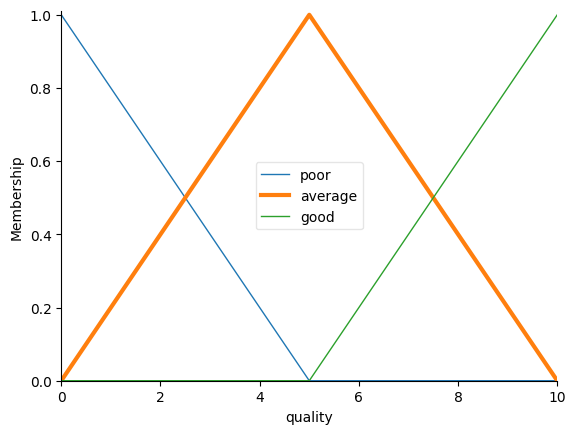

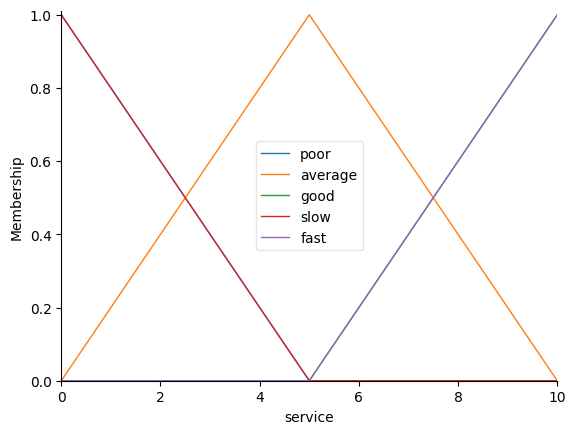

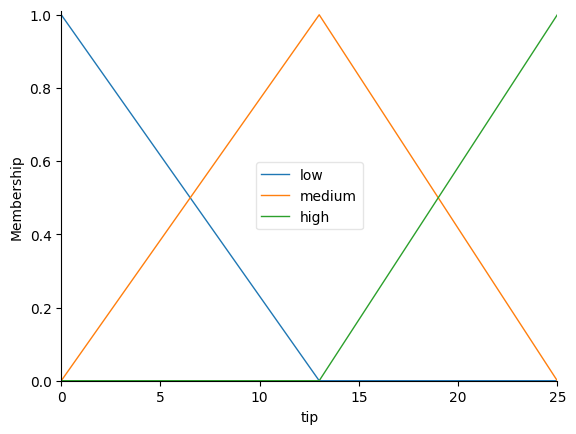

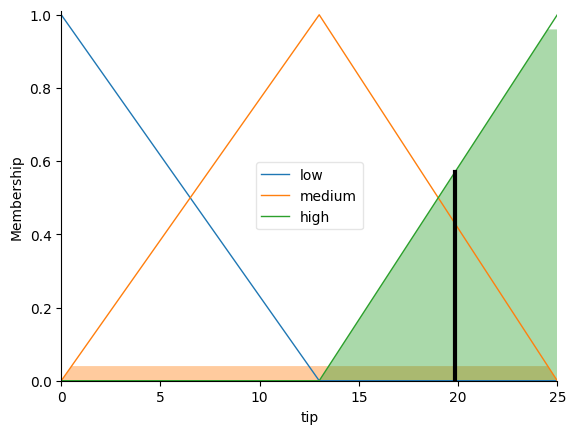

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

service['slow'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['fast'] = fuzz.trimf(service.universe, [5, 10, 10])

quality['average'].view()
service.view()
tip.view()

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)

In [1]:
!pip install -U pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.7 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=ce6f4b1f0d2990a417d817987738660302da813c9102b6aed2d8bac7ea49d9cb
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [2]:
import numpy as np
import pandas as pd
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.population import Population
import random

In [3]:
distance_matrix = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

  ]



cost_matrix = []


def setCost():
  for i in range(12):
    cost_matrix.append(random.randint(10, 80))
  print(cost_matrix)


setCost()

def setDistance():
  for i in range(12):
    for j in range(12):
      if (i == j):
        distance_matrix[i][j] = 0
      else:
        distance_matrix[i][j] = random.randint(1, 200)

  print(pd.DataFrame(distance_matrix))


setDistance()




def getDistance(i, j):
  return distance_matrix[i][j]

def getCost(i):
  return cost_matrix[i]

[76, 75, 52, 42, 37, 61, 23, 23, 17, 80, 74, 47]
     0    1    2    3    4    5    6    7    8    9    10   11
0     0  179  186  114   12  168  178  169    7  190  187   87
1   182    0  107  196   32  182   57  119   81   27  194  186
2    36   60    0  182   42   57   62  184   38   32   57  113
3   199  194  126    0   21   12  143   30  139  182  127  198
4   119   13   67  112    0  199   49  193   11   31   66  106
5   179   87   93   17  108    0   64  118   35  186  176   83
6   194  171  118   45  147  120    0  162  190  127    3   86
7   112   26  157  116  103  109   34    0  184  196  200   43
8   158  100   91  169  181  163  181   35    0   12   66   47
9   106   42  137   36   96   92   14   95  179    0   12  103
10  140  113  131   20  119   66   38  115   58  179    0   74
11  172  192   51   94   52   86  192   43  138  174  110    0


In [4]:
import numpy as np
import random
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.population import Population

# تعریف مکان‌ها به صورت اعداد
hotels = [0, 1, 2, 3]
restaurants = [4, 5, 6, 7]
science_spots = [8, 9, 10, 11]
locations = hotels + restaurants + science_spots

# ایجاد جمعیت اولیه به صورت تصادفی
pop_size = 5
mt = 4

initial_population = []
for _ in range(pop_size):
    route = random.sample(locations, mt)
    initial_population.append(route)

initial_population = np.array(initial_population, dtype=int)

for route in initial_population:
   distance = 0
   cost = 0
   for i in range(len(route) - 1):
      start, end = route[i], route[i + 1]
      # print(getDistance(start, end))
      distance += getDistance(start, end)

   for j in range(len(route)):
      cost += getCost(route[j])

   print(f"{route} => distance : {distance}, cost: {cost}")

# تبدیل جمعیت اولیه به فرمت Population در Pymoo
initial_population = Population.new("X", initial_population)


# تعریف کلاس مسئله
class HotelRouteProblem(Problem):
    def __init__(self):
        super().__init__(n_var=mt, n_obj=2, n_constr=0, xl=0, xu=len(locations) - 1, type_var=int)  # n_obj=2 برای بهینه‌سازی چندهدفه

    def _evaluate(self, x, out, *args, **kwargs):
        total_distance = []
        total_cost = []
        for route in x:
            route = route.astype(int)
            distance = 0
            cost = 0
            for i in range(len(route) - 1):
                start, end = route[i], route[i + 1]
                distance += getDistance(start, end)

            for j in range(len(route)):
                cost += getCost(route[j])



            total_distance.append(distance)
            total_cost.append(cost)


        # اضافه کردن هزینه و فاصله به عنوان توابع هدف، اطمینان از شکل صحیح (pop_size, n_obj)
        out["F"] = np.column_stack([total_distance, total_cost])

# ایجاد نمونه‌ای از مسئله
problem = HotelRouteProblem()

# تنظیمات الگوریتم NSGA-II با جمعیت اولیه
algorithm = NSGA2(pop_size=pop_size, sampling=initial_population)

# اجرای الگوریتم
res = minimize(problem, algorithm, ('n_gen', 200), verbose=True)

# نمایش نتایج
best_index = np.argmin(res.F[:, 1])  # یافتن ایندکس با کمترین هزینه

# نمایش بهترین مسیر، فاصله و هزینه
best_route = res.X[best_index].astype(int)
best_distance = res.F[best_index, 0]
best_cost = res.F[best_index, 1]

print('---------------')
print("Best Route (order of locations):", best_route)
print("Best Distance:", best_distance)
print("Best Cost:", best_cost)


[ 6  8  9 11] => distance : 305, cost: 167
[0 3 4 7] => distance : 328, cost: 178
[ 6  7 10  9] => distance : 541, cost: 200
[9 8 2 1] => distance : 330, cost: 224
[10  6  9  0] => distance : 271, cost: 253
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        5 |      2 |             - |             -
     2 |       10 |      1 |  4.900000E+01 |         ideal
     3 |       15 |      4 |  0.7443609023 |         ideal
     4 |       20 |      5 |  0.000000E+00 |             f
     5 |       25 |      5 |  0.000000E+00 |             f
     6 |       30 |      5 |  0.000000E+00 |             f
     7 |       35 |      5 |  0.4956521739 |         ideal
     8 |       40 |      5 |  0.0211227264 |             f
     9 |       45 |      5 |  0.1142085599 |             f
    10 |       50 |      5 |  0.000000E+00 |             f
    11 |       55 |      5 |  0.000000E+00 |             f
    12 |       60 |      5 |  0.000000E+00 |             f
    13 |       65 |      5

In [6]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


46.944218357553886


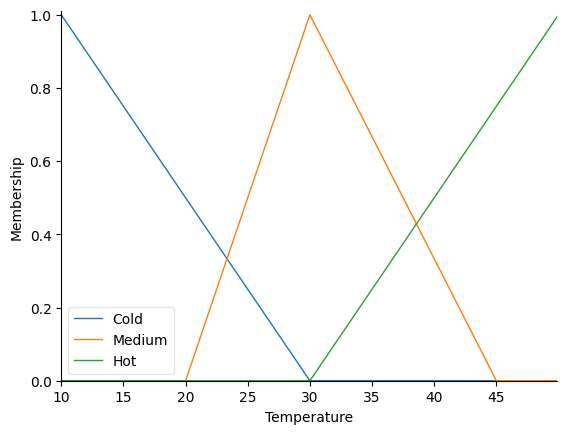

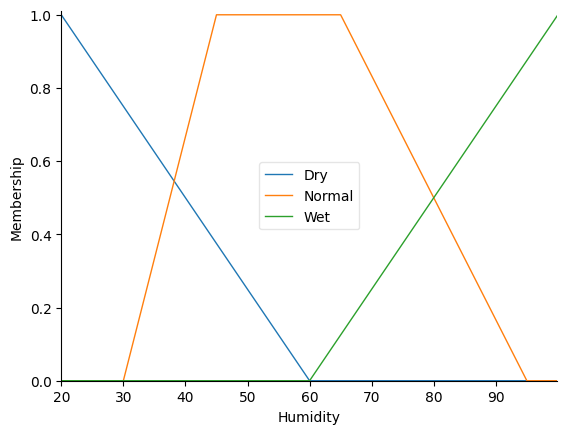

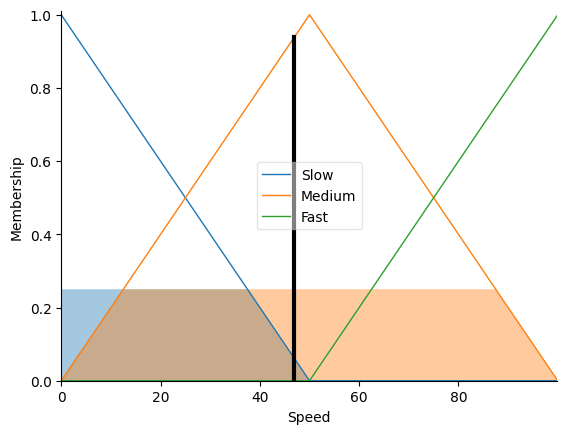

In [36]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Temperature = ctrl.Antecedent(np.arange(10, 50, 0.1), 'Temperature')
Temperature["Cold"] = fuzz.trimf(Temperature.universe, [10, 10, 30])
Temperature["Medium"] = fuzz.trimf(Temperature.universe, [20, 30, 45])
Temperature["Hot"] = fuzz.trimf(Temperature.universe, [30, 50, 50])


Humidity = ctrl.Antecedent(np.arange(20, 100, 0.1), 'Humidity')
Humidity["Dry"] = fuzz.trimf(Humidity.universe, [20, 20, 60])
Humidity["Normal"] = fuzz.trapmf(Humidity.universe, [30, 45, 65, 95])
Humidity["Wet"] = fuzz.trimf(Humidity.universe, [60, 100, 100])

Speed = ctrl.Consequent(np.arange(0, 100, 0.1), 'Speed')
Speed["Slow"] = fuzz.trimf(Speed.universe, [0, 0, 50])
Speed["Medium"] = fuzz.trimf(Speed.universe, [0, 50, 100])
Speed["Fast"] = fuzz.trimf(Speed.universe, [50, 100, 100])

Temperature.view()
Humidity.view()



rule1 = ctrl.Rule(Temperature['Cold'] & Humidity['Wet'], Speed['Slow'])
rule2 = ctrl.Rule(Temperature['Cold'] & Humidity['Normal'], Speed['Slow'])
rule3 = ctrl.Rule(Temperature['Medium'] & Humidity['Wet'], Speed['Slow'])

rule4 = ctrl.Rule(Temperature['Cold'] & Humidity['Dry'], Speed['Medium'])
rule5 = ctrl.Rule(Temperature['Medium'] & Humidity['Wet'], Speed['Medium'])
rule6 = ctrl.Rule(Temperature['Hot'] & Humidity['Wet'], Speed['Medium'])

rule7 = ctrl.Rule(Temperature['Medium'] & Humidity['Dry'], Speed['Fast'])
rule8 = ctrl.Rule(Temperature['Hot'] & Humidity['Normal'], Speed['Fast'])
rule9 = ctrl.Rule(Temperature['Hot'] & Humidity['Dry'], Speed['Fast'])


AirCondition_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
AirCondition = ctrl.ControlSystemSimulation(AirCondition_ctrl)

AirCondition.input['Temperature'] = 25
AirCondition.input['Humidity'] = 70

AirCondition.compute()

print(AirCondition.output['Speed'])
Speed.view(sim=AirCondition)


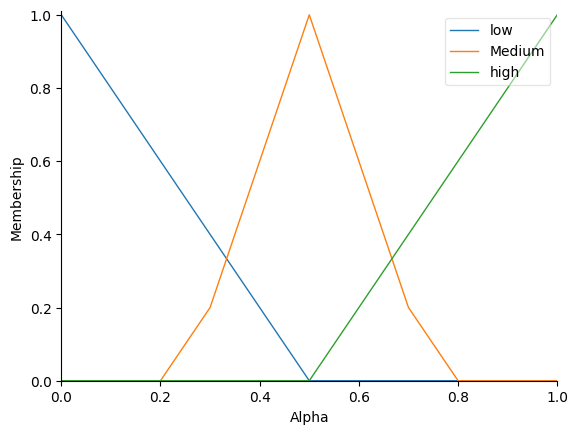

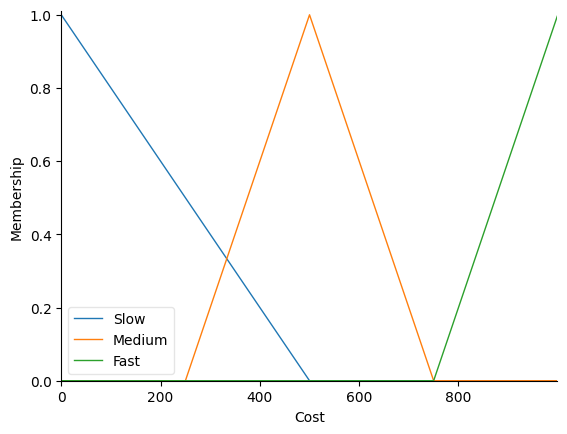

In [42]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Alpha = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Alpha')
Alpha["low"] = fuzz.trimf(Alpha.universe, [0, 0, 0.5])
Alpha["Medium"] = fuzz.trimf(Alpha.universe, [0.25, 0.5, 0.75])
Alpha["high"] = fuzz.trimf(Alpha.universe, [0.5, 1, 1])


Cost = ctrl.Consequent(np.arange(0, 1000, 1), 'Cost')
Cost["low"] = fuzz.trimf(Cost.universe, [0, 0, 500])
Cost["Medium"] = fuzz.trimf(Cost.universe, [250, 500, 750])
Cost["high"] = fuzz.trimf(Cost.universe, [750, 1000, 1000])



Alpha.view()
Cost.view()



In [39]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# تعریف متغیرهای فازی عمومی
alpha = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'alpha')  # پارامتر فازی اعتبار
alpha['low'] = fuzz.trimf(alpha.universe, [0, 0, 0.5])
alpha['medium'] = fuzz.trimf(alpha.universe, [0, 0.5, 1])
alpha['high'] = fuzz.trimf(alpha.universe, [0.5, 1, 1])

# تابع عضویت برای هزینه خدمات هتل
service_cost = ctrl.Consequent(np.arange(0, 1001, 1), 'service_cost')
service_cost['low'] = fuzz.trimf(service_cost.universe, [0, 0, 500])
service_cost['medium'] = fuzz.trimf(service_cost.universe, [0, 500, 1000])
service_cost['high'] = fuzz.trimf(service_cost.universe, [500, 1000, 1000])

# تابعی برای ایجاد و محاسبه سیستم فازی هر هتل
def compute_hotel_service_cost(SCi_low_val, SCi_medium_val, SCi_high_val, alpha_val):
    # تعریف پارامترهای فازی برای هزینه خدمات این هتل
    SCi_low = ctrl.Antecedent(np.arange(0, 1001, 1), 'SCi_low')
    SCi_medium = ctrl.Antecedent(np.arange(0, 1001, 1), 'SCi_medium')
    SCi_high = ctrl.Antecedent(np.arange(0, 1001, 1), 'SCi_high')

    # توابع عضویت برای هزینه‌های فازی
    SCi_low['low'] = fuzz.trimf(SCi_low.universe, [0, 0, SCi_low_val])
    SCi_medium['medium'] = fuzz.trimf(SCi_medium.universe, [0, SCi_medium_val, 1000])
    SCi_high['high'] = fuzz.trimf(SCi_high.universe, [SCi_high_val, 1000, 1000])

    # تعریف قوانین فازی براساس شرایط α و پارامترهای فازی
    rule1 = ctrl.Rule(alpha['low'] & SCi_low['low'], service_cost['low'])
    rule2 = ctrl.Rule(alpha['medium'] & SCi_medium['medium'], service_cost['medium'])
    rule3 = ctrl.Rule(alpha['high'] & SCi_high['high'], service_cost['high'])

    # ایجاد سیستم کنترل فازی و شبیه‌سازی
    service_cost_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    service_cost_simulation = ctrl.ControlSystemSimulation(service_cost_ctrl)

    # ورودی‌های سیستم فازی
    service_cost_simulation.input['SCi_low'] = SCi_low_val
    service_cost_simulation.input['SCi_medium'] = SCi_medium_val
    service_cost_simulation.input['SCi_high'] = SCi_high_val
    service_cost_simulation.input['alpha'] = alpha_val

    # محاسبه هزینه خدمات
    service_cost_simulation.compute()
    return service_cost_simulation.output['service_cost']

# مثال استفاده برای چند هتل
hotels_costs = []
alpha_value = 0.1  # مقدار اعتبار

# تعریف هزینه‌های فازی برای هر هتل
hotels = [
    {'SCi_low': 200, 'SCi_medium': 500, 'SCi_high': 800},
    {'SCi_low': 250, 'SCi_medium': 600, 'SCi_high': 900},
    {'SCi_low': 150, 'SCi_medium': 450, 'SCi_high': 700}
]

# محاسبه هزینه خدمات برای هر هتل
for i, hotel in enumerate(hotels):
    cost = compute_hotel_service_cost(hotel['SCi_low'], hotel['SCi_medium'], hotel['SCi_high'], alpha_value)
    hotels_costs.append(cost)
    print(f"Hotel {i+1} - Estimated Service Cost: {cost:.2f}")

# نمایش هزینه‌های محاسبه‌شده
print("All Hotels' Estimated Service Costs:", hotels_costs)


Hotel 1 - Estimated Service Cost: 500.00
Hotel 2 - Estimated Service Cost: 500.00
Hotel 3 - Estimated Service Cost: 500.00
All Hotels' Estimated Service Costs: [500.00000000000347, 500.00000000000347, 500.00000000000347]
